<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_Caixeiro_Viajante_GA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from random import randint, random
import random
import matplotlib.pyplot as plt
import math
import copy

#Criando as funções principais do Algorítmo Genético

## Criando as coordenadas das 100 cidades

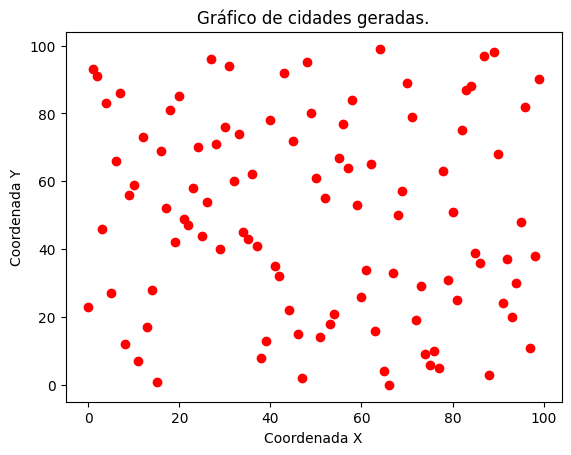

In [3]:
NRO_CIDADES = 100

x_points = list(range(NRO_CIDADES))
y_points = list(range(NRO_CIDADES))

random.shuffle(x_points)
random.shuffle(y_points)

plt.title("Gráfico de cidades geradas.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')
plt.show()

###População Inicial

In [4]:
def populacaoInicial(tamanho):
  percursos = []
  percurso = []
  for i in range(0, tamanho):
    cidades = list(range(0, NRO_CIDADES))
    listaCidades = cidades.copy()
    random.shuffle(listaCidades)
    for cidade in cidades:
      cidadePercurso = random.choice(listaCidades)
      listaCidades.remove(cidadePercurso)
      percurso.append(cidadePercurso)
    percursos.append(percurso)
    percurso = []
    cidades = []
  return percursos;

In [5]:
##DEBUG função População Inicial

percursos = populacaoInicial(2)

for percurso in percursos:
  print(percurso)


[69, 80, 30, 93, 24, 4, 42, 66, 98, 59, 37, 3, 43, 61, 70, 16, 86, 0, 53, 82, 35, 2, 55, 95, 73, 91, 13, 10, 84, 76, 92, 96, 40, 78, 32, 83, 47, 54, 74, 56, 88, 77, 28, 22, 15, 71, 26, 48, 5, 85, 36, 89, 51, 46, 38, 14, 97, 34, 11, 31, 81, 9, 62, 79, 52, 20, 27, 41, 44, 99, 18, 45, 60, 6, 19, 58, 25, 39, 68, 72, 49, 63, 64, 90, 87, 57, 23, 75, 67, 50, 1, 94, 21, 7, 29, 65, 8, 12, 17, 33]
[6, 82, 84, 3, 21, 7, 69, 88, 76, 15, 38, 32, 16, 43, 54, 51, 11, 27, 41, 98, 49, 40, 36, 25, 85, 89, 9, 86, 66, 12, 0, 68, 65, 18, 37, 72, 75, 4, 30, 87, 97, 28, 10, 19, 24, 35, 63, 71, 39, 60, 2, 13, 17, 8, 46, 45, 50, 23, 90, 58, 34, 33, 73, 52, 92, 31, 44, 55, 20, 67, 26, 80, 14, 29, 22, 91, 83, 81, 94, 99, 74, 62, 56, 59, 77, 5, 1, 93, 96, 48, 57, 70, 47, 53, 42, 64, 95, 61, 78, 79]


In [6]:
print(x_points[percursos[0][0]],y_points[percursos[0][0]] )

49 80


###Verifica Elementos Duplicados

In [7]:
def has_duplicates(lst):
    n = max(set(lst), key=lst.count)
    return lst.count(n) > 1

In [8]:
##DEBUG função duplicados
listaDuplicados = [2, 1, 2, 5, 2]
print(has_duplicates(listaDuplicados))

listaSemDuplicados = [1, 2, 3, 4, 5]
print(has_duplicates(listaSemDuplicados))

True
False


###Função de Avaliação (fit)

In [9]:
##Calcular Distância Euclidiana
##distancia = sqrt(((x2 - x1) ^ 2) + ((y2 - y1) ^ 2));
def FuncaoDeAvaliacao(percursos):
  soma_distancia = np.zeros(len(percursos));
  for index, percurso in enumerate(percursos):
    for i, cidade in enumerate(percurso):
      if i < (len(percurso) - 1):
        soma_distancia[index] += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
      else:
        soma_distancia[index] += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
    if has_duplicates(percurso):
      soma_distancia[index] = 999999999
  return soma_distancia;


def FuncaoDeAvaliacaoV2(percurso):
  soma_distancia = 0
  for i, cidade in enumerate(percurso):
    if i < (len(percurso) - 1):
      soma_distancia += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
    else:
      soma_distancia += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
  if has_duplicates(percurso):
    soma_distancia = 999999999
  return soma_distancia;


In [10]:
##DEBUG Função de Avaliação

percursos = populacaoInicial(2)
print(percursos)
avaliacao = FuncaoDeAvaliacao(percursos)
print(avaliacao)

print(f'funcao v2 {FuncaoDeAvaliacaoV2(percursos[0])}')

[[5, 94, 19, 73, 88, 42, 32, 24, 7, 3, 1, 61, 13, 40, 33, 51, 39, 6, 74, 63, 83, 48, 59, 46, 92, 86, 80, 62, 84, 65, 30, 90, 34, 2, 81, 22, 55, 0, 49, 54, 69, 99, 67, 78, 37, 8, 23, 20, 97, 38, 9, 79, 56, 45, 31, 14, 57, 12, 21, 72, 68, 91, 64, 41, 95, 85, 77, 18, 58, 98, 96, 93, 71, 17, 15, 43, 76, 16, 25, 52, 89, 82, 36, 35, 26, 10, 47, 87, 66, 29, 28, 4, 75, 50, 70, 53, 44, 60, 11, 27], [66, 13, 89, 51, 26, 92, 40, 75, 90, 54, 64, 74, 93, 31, 44, 0, 53, 58, 28, 15, 70, 27, 19, 55, 16, 12, 57, 20, 61, 98, 42, 41, 7, 37, 95, 94, 2, 96, 77, 23, 14, 11, 69, 46, 49, 45, 91, 84, 21, 80, 82, 87, 22, 39, 43, 97, 9, 76, 65, 35, 56, 81, 71, 38, 79, 17, 1, 47, 33, 63, 50, 62, 8, 6, 3, 36, 48, 99, 32, 30, 86, 68, 34, 73, 60, 59, 29, 5, 85, 18, 88, 52, 10, 83, 78, 67, 4, 72, 24, 25]]
[5260.00682467 5599.04670321]
funcao v2 5260.006824672209


###Preserva Melhor da Geração

In [11]:
def preservaMelhor(geracao, novaGeracao):
  avaliacao = FuncaoDeAvaliacao(geracao)
  maior = 0
  for i in range(len(avaliacao)):
    if avaliacao[maior] > avaliacao[i]:
      maior = i
  #print(avaliacao[maior])
  novaGeracao.append(geracao[maior])


In [12]:
#Debug preservar melhor geraçao
novaGeracao = []
preservaMelhor(percursos, novaGeracao)
print(novaGeracao)

[[5, 94, 19, 73, 88, 42, 32, 24, 7, 3, 1, 61, 13, 40, 33, 51, 39, 6, 74, 63, 83, 48, 59, 46, 92, 86, 80, 62, 84, 65, 30, 90, 34, 2, 81, 22, 55, 0, 49, 54, 69, 99, 67, 78, 37, 8, 23, 20, 97, 38, 9, 79, 56, 45, 31, 14, 57, 12, 21, 72, 68, 91, 64, 41, 95, 85, 77, 18, 58, 98, 96, 93, 71, 17, 15, 43, 76, 16, 25, 52, 89, 82, 36, 35, 26, 10, 47, 87, 66, 29, 28, 4, 75, 50, 70, 53, 44, 60, 11, 27]]


##Cruzamento Genético

In [13]:
##TODO - Implementar cruzamento OX, para evitar repetição

def cruzamento(geracao, num, nova):
  while True:
    for i in range(0, num):
      indA = random.randrange(0,len(geracao))
      indB = indA;
      while indA==indB:
        indB = random.randrange(0,len(geracao))
      #print(f'cruzamento {indA} e {indB}')
      ponto1 = random.randrange(1,round((len(geracao[0]) - 1)))
      #print(f'ponto de corte {ponto1}')

      paiA = geracao[indA]
      paiB = geracao[indB]

      res1 = list(set(paiA[0:ponto1]) & set(paiB[ponto1:]))
      res2 = list(set(paiB[0:ponto1]) & set(paiA[ponto1:]))

      cromossomosA = paiA[0:ponto1]
      cromossomosB = paiB[ponto1:]
      for i in range(0, len(res1)):
        cromossomosB.remove(res1[i])
        cromossomosB.append(res2[i])

      filho1 = cromossomosA
      filho1.extend(cromossomosB)
      #print(f'filho1 {filho1} duplicado? {has_duplicates(filho1)}')
      nova.append(filho1)
    break





In [14]:
##DEBUG cuzamento
novaGeracao = []
geracao = populacaoInicial(5)
print(geracao)
#preservaMelhor(geracao, novaGeracao)
cruzamento(geracao, 4, novaGeracao)
print(geracao)
print(novaGeracao)

[[31, 80, 92, 85, 4, 88, 2, 8, 93, 9, 41, 98, 82, 78, 0, 26, 56, 71, 52, 42, 3, 76, 84, 94, 90, 89, 48, 62, 34, 59, 7, 60, 13, 49, 87, 28, 97, 23, 30, 67, 45, 91, 61, 54, 95, 96, 47, 16, 57, 55, 81, 6, 40, 65, 20, 32, 37, 29, 68, 36, 70, 63, 15, 83, 39, 64, 19, 11, 17, 21, 86, 58, 74, 77, 22, 99, 35, 10, 73, 5, 53, 51, 69, 38, 44, 27, 43, 24, 75, 1, 18, 66, 72, 50, 79, 12, 46, 25, 14, 33], [32, 75, 33, 22, 2, 47, 27, 42, 7, 39, 66, 9, 73, 72, 92, 85, 97, 91, 50, 51, 8, 24, 37, 4, 54, 95, 90, 5, 55, 35, 44, 31, 77, 89, 53, 1, 18, 87, 36, 74, 52, 80, 38, 69, 11, 12, 25, 49, 70, 26, 94, 3, 96, 57, 29, 23, 93, 34, 14, 99, 79, 15, 78, 56, 71, 6, 63, 82, 19, 98, 64, 17, 45, 43, 48, 16, 28, 59, 13, 68, 10, 81, 84, 67, 41, 0, 88, 83, 40, 86, 61, 58, 76, 20, 62, 21, 46, 30, 65, 60], [86, 35, 88, 93, 83, 56, 0, 55, 13, 92, 12, 97, 45, 25, 29, 71, 94, 47, 54, 48, 24, 21, 85, 27, 37, 11, 20, 63, 9, 17, 82, 52, 5, 41, 10, 34, 14, 80, 76, 59, 53, 18, 84, 40, 1, 89, 78, 38, 90, 75, 7, 6, 39, 44, 50, 

##Mutação

In [15]:
#TODO: Implementar verificação de avaliação antes de inserir o individuo que sofreu mutação na solução, incluir porcentagem para isso ocorrer

def mutacao(geracao, taxaMutacao):
  if randint(1,100) <= taxaMutacao:
    individuoMutacao = random.randrange(0,len(geracao))
    print(f'Realizando mutacao no Individuo:  {individuoMutacao}')
    gene_1 = random.randrange(0,len(geracao[0]))
    gene_2 = random.randrange(0,len(geracao[0]))
    while gene_1 == gene_2:
      gene_2 = random.randrange(0,len(geracao[0]))
    copiaGeracao = copy.deepcopy(geracao)
    temp = copiaGeracao[individuoMutacao][gene_1]
    copiaGeracao[individuoMutacao][gene_1] = copiaGeracao[individuoMutacao][gene_2]
    copiaGeracao[individuoMutacao][gene_2] = temp
    #print(f'Individuo a ser mutado:  {geracao[individuoMutacao]} //Resultado após mutação:  {copiaGeracao[individuoMutacao]}')
    avaliacaoCopia = FuncaoDeAvaliacaoV2(copiaGeracao[individuoMutacao])
    avaliacaoGeracao = FuncaoDeAvaliacaoV2(geracao[individuoMutacao])
    #print(f'Avaliação antes da mutação: {avaliacaoGeracao}')
    #print(f'Avaliação após a mutação: {avaliacaoCopia}')
    ##30% de chances de verificar se a mutação criou individuo melhor antes de executar a mutação
    if random.randrange(0,100) < 101: ##Forcando a sempre entrar aqui para testes
      print(f'Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...')
      if avaliacaoCopia < avaliacaoGeracao:
        print(f'Avaliação superior ao anterior, enviando para a mansão X')
        geracao[individuoMutacao] = copiaGeracao[individuoMutacao]
      else:
        print(f'Avaliação abaixo do anterior, tentando uma nova mutacao ...')
        mutacao(geracao,100)
    else:
      print(f'Mutação não considerou avaliação')
      geracao[individuoMutacao] = copiaGeracao[individuoMutacao]




In [16]:
#Teste Mutacao

geracao = populacaoInicial(100)
print(geracao)

for i in range(0,100):
  mutacao(geracao, 100)
print(geracao)

[[62, 16, 81, 71, 50, 65, 63, 87, 88, 11, 26, 72, 0, 85, 52, 17, 21, 37, 41, 2, 22, 73, 39, 75, 20, 15, 33, 84, 44, 94, 77, 42, 57, 5, 79, 91, 70, 67, 78, 93, 46, 14, 61, 60, 83, 98, 3, 86, 56, 74, 97, 10, 43, 90, 12, 99, 92, 82, 4, 18, 58, 27, 19, 38, 30, 48, 49, 7, 9, 25, 76, 28, 89, 51, 69, 6, 13, 53, 24, 95, 35, 80, 29, 31, 36, 64, 45, 40, 96, 59, 54, 32, 66, 47, 34, 23, 1, 8, 68, 55], [42, 38, 67, 28, 44, 32, 70, 58, 97, 84, 61, 53, 55, 48, 90, 80, 40, 93, 2, 99, 34, 18, 62, 81, 1, 87, 98, 27, 17, 4, 59, 66, 8, 78, 24, 54, 37, 19, 15, 47, 36, 72, 69, 89, 85, 50, 82, 46, 60, 95, 43, 10, 33, 75, 79, 76, 52, 65, 94, 25, 0, 96, 83, 22, 31, 68, 23, 92, 11, 20, 41, 12, 91, 49, 35, 26, 73, 3, 13, 71, 64, 51, 29, 56, 16, 74, 7, 45, 77, 39, 30, 88, 5, 86, 57, 6, 21, 9, 63, 14], [74, 87, 10, 44, 27, 73, 19, 43, 93, 3, 68, 67, 13, 89, 46, 48, 16, 26, 97, 45, 64, 78, 53, 18, 59, 14, 92, 82, 77, 35, 34, 80, 70, 79, 32, 24, 58, 84, 39, 88, 38, 47, 91, 72, 22, 76, 23, 85, 83, 8, 49, 1, 60, 36, 3

##Execução do Algoritmo Genético

Distância percorrida: 4568.8402655425


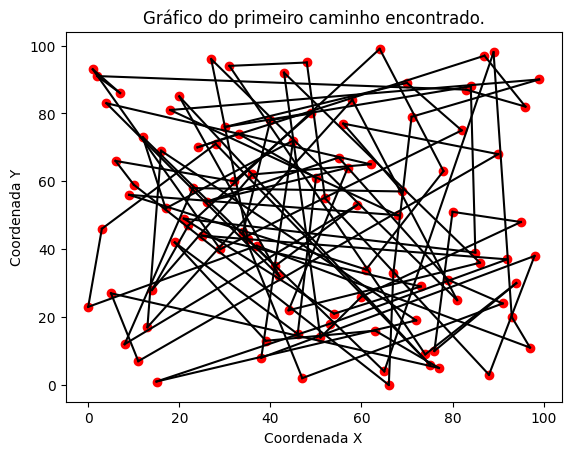

Geraçao 30000
Geraçao 29900
Geraçao 29800
Realizando mutacao no Individuo:  5
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Realizando mutacao no Individuo:  50
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Geraçao 29700
Realizando mutacao no Individuo:  86
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  52
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação abaixo do anterior, tentando uma nova mutacao ...
Realizando mutacao no Individuo:  14
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anterior, enviando para a mansão X
Geraçao 29600
Realizando mutacao no Individuo:  11
Entrou nos 30% de chance de avaliação da Mutação - Avaliando ...
Avaliação superior ao anteri

In [17]:
#PRESETS AG
#------------------------------
numGeracoes = 30000
populacao = 100
taxaCruzamento = 90
taxaMutacao = 1
#------------------------------
p0 = populacaoInicial(populacao)
melhorPrimeiraGeracao = []
preservaMelhor(p0, melhorPrimeiraGeracao)
print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(melhorPrimeiraGeracao[0])}')


plt.title("Gráfico do primeiro caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

for i in range(0, len(melhorPrimeiraGeracao[0]) - 1):
  plt.plot([x_points[melhorPrimeiraGeracao[0][i]], x_points[melhorPrimeiraGeracao[0][i + 1]]], [y_points[melhorPrimeiraGeracao[0][i]], y_points[melhorPrimeiraGeracao[0][i + 1]]], 'k-')
  if i == (len(melhorPrimeiraGeracao[0]) - 2):
    plt.plot([x_points[melhorPrimeiraGeracao[0][i + 1]], x_points[melhorPrimeiraGeracao[0][0]]], [y_points[melhorPrimeiraGeracao[0][i + 1]], y_points[melhorPrimeiraGeracao[0][0]]], 'k-')
plt.show()

avaliacaoP0 = FuncaoDeAvaliacao(p0)

geracao = copy.deepcopy(p0)
while numGeracoes > 0:

  if numGeracoes % 100 == 0:
    print(f'Geraçao {numGeracoes}')

  novaGeracao = []
  mutacao(geracao, taxaMutacao)
  preservaMelhor(geracao, novaGeracao)
  cruzamento(geracao, taxaCruzamento, novaGeracao)
  numGeracoes = numGeracoes - 1
  avaliacaoNovaGeracao = FuncaoDeAvaliacao(novaGeracao)
  novaGeracao2 = sorted(zip(avaliacaoNovaGeracao, novaGeracao), reverse=True)
  geracao = [x for _, x in novaGeracao2]



geracao = novaGeracao.copy()
novaGeracao = []
preservaMelhor(geracao, novaGeracao)




Distância percorrida: 2231.5931892547264
Duplicidade? False


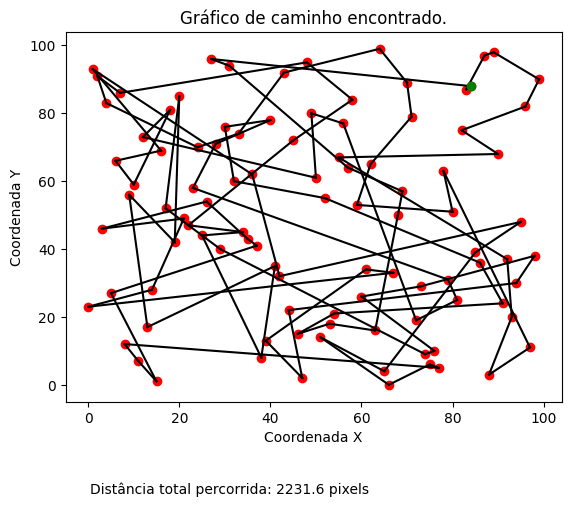

In [36]:
plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(novaGeracao[0])}')
print(f'Duplicidade? {has_duplicates(novaGeracao[0])}')

for i in range(0, len(novaGeracao[0]) - 1):
  plt.plot([x_points[novaGeracao[0][i]], x_points[novaGeracao[0][i + 1]]], [y_points[novaGeracao[0][i]], y_points[novaGeracao[0][i + 1]]], 'k-')
  if i == (len(novaGeracao[0]) - 2):
    plt.plot([x_points[novaGeracao[0][i + 1]], x_points[novaGeracao[0][0]]], [y_points[novaGeracao[0][i + 1]], y_points[novaGeracao[0][0]]], 'k-')

plt.plot(x_points[novaGeracao[0][0]], y_points[novaGeracao[0][0]], 'go')


# Adicionando a legenda com a distância total
plt.figtext(0.05,-0.25, 'Distância total percorrida: 2231.6 pixels', transform=plt.gca().transAxes)

plt.show()

Distância percorrida: 5569.935666325437
Duplicidade? False
Caminho percorrido: [76, 64, 23, 3, 29, 52, 33, 14, 5, 17, 48, 11, 6, 62, 27, 74, 58, 53, 94, 89, 69, 7, 2, 79, 21, 84, 0, 88, 38, 97, 60, 8, 68, 39, 15, 12, 49, 36, 98, 42, 59, 95, 99, 81, 57, 22, 61, 56, 18, 43, 31, 50, 32, 24, 85, 91, 1, 55, 35, 75, 51, 30, 80, 96, 71, 54, 73, 25, 45, 40, 20, 65, 13, 77, 26, 66, 28, 82, 16, 83, 67, 41, 9, 63, 78, 4, 10, 92, 44, 70, 37, 34, 47, 72, 46, 87, 19, 90, 93, 86]


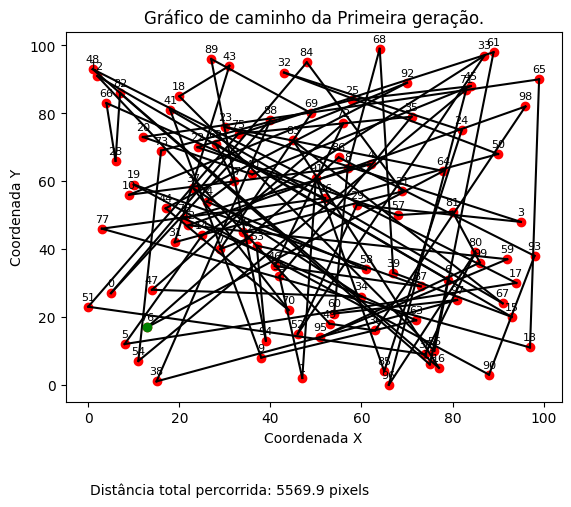

In [37]:

plt.title("Gráfico de caminho da Primeira geração.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(f'Distância percorrida: {FuncaoDeAvaliacaoV2(p0[0])}')
print(f'Duplicidade? {has_duplicates(p0[0])}')
print(f'Caminho percorrido: {p0[0]}')

for i in range(0, len(p0[0]) - 1):
    plt.plot([x_points[p0[0][i]], x_points[p0[0][i + 1]]], [y_points[p0[0][i]], y_points[p0[0][i + 1]]], 'k-')
    if i == (len(p0[0]) - 2):
        plt.plot([x_points[p0[0][i + 1]], x_points[p0[0][0]]], [y_points[p0[0][i + 1]], y_points[p0[0][0]]], 'k-')

plt.plot(x_points[p0[0][0]], y_points[p0[0][0]], 'go')

# Adicionando rótulos aos pontos
for i, valor in enumerate(p0[0]):
    plt.annotate(str(valor), (x_points[valor], y_points[valor]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Adicionando a legenda com a distância total
plt.figtext(0.05,-0.25, 'Distância total percorrida: 5569.9 pixels', transform=plt.gca().transAxes)

plt.show()